In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians, sin, cos, sqrt, atan2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import *


In [7]:
df = pd.read_csv("deliverytime.csv")
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [9]:
df.drop(['ID','Delivery_person_ID'], axis=1, inplace=True)


In [10]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

df['Distance_km'] = df.apply(lambda x: haversine(
    x['Restaurant_latitude'],
    x['Restaurant_longitude'],
    x['Delivery_location_latitude'],
    x['Delivery_location_longitude']), axis=1)


In [11]:
df.drop(['Restaurant_latitude','Restaurant_longitude',
         'Delivery_location_latitude','Delivery_location_longitude'], axis=1, inplace=True)


In [12]:
le = LabelEncoder()

df['Type_of_order'] = le.fit_transform(df['Type_of_order'])
df['Type_of_vehicle'] = le.fit_transform(df['Type_of_vehicle'])


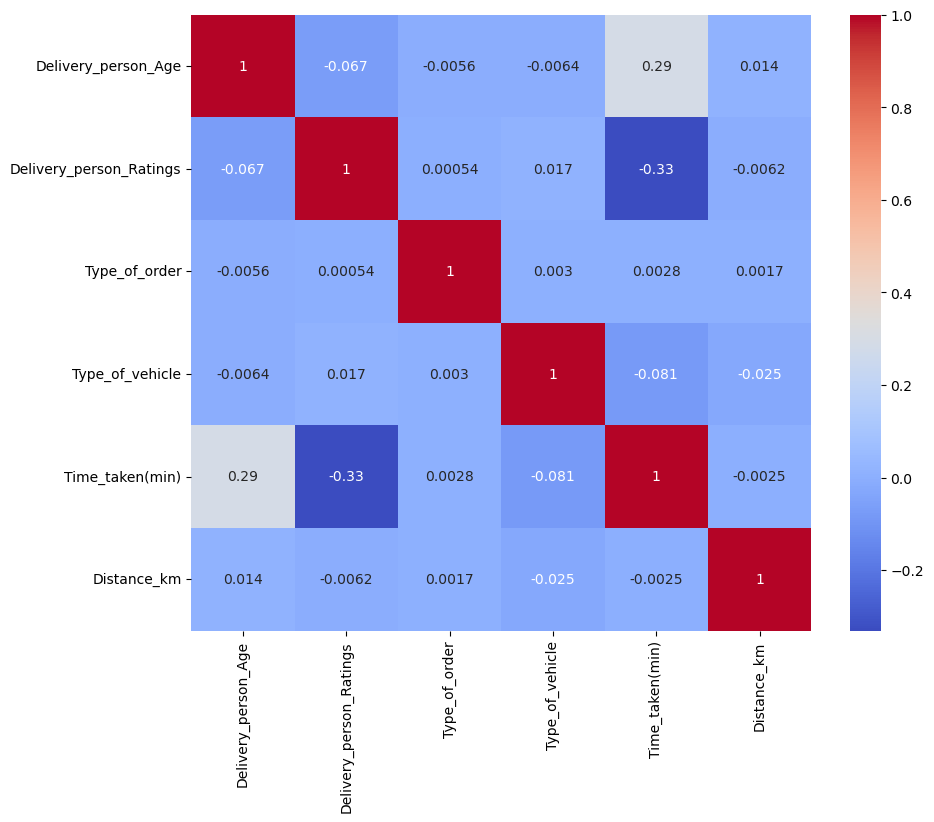

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
            annot=True, cmap='coolwarm')
plt.show()


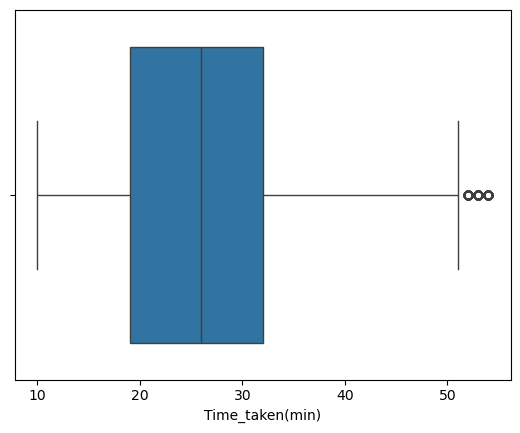

In [14]:
sns.boxplot(x=df['Time_taken(min)'])
plt.show()


In [15]:
scaler = StandardScaler()
df[['Delivery_person_Age','Delivery_person_Ratings','Distance_km']] = scaler.fit_transform(
    df[['Delivery_person_Age','Delivery_person_Ratings','Distance_km']])


In [16]:
X = df.drop('Time_taken(min)', axis=1)
y = df['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("R2 Score:", r2_score(y_test, pred_lr))


MAE: 6.63629977439165
MSE: 71.62550417754662
R2 Score: 0.18308592255906686


In [17]:
df['Status'] = df['Time_taken(min)'].apply(lambda x: 1 if x <= 30 else 0)


In [18]:
X2 = df.drop(['Time_taken(min)','Status'], axis=1)
y2 = df['Status']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

log = LogisticRegression()
log.fit(X2_train, y2_train)

pred_log = log.predict(X2_test)


In [19]:
print("Accuracy:", accuracy_score(y2_test, pred_log))
print("Precision:", precision_score(y2_test, pred_log))
print("Recall:", recall_score(y2_test, pred_log))
print("F1 Score:", f1_score(y2_test, pred_log))


Accuracy: 0.8005263735058669
Precision: 0.7996599973845953
Recall: 0.9551702592939706
F1 Score: 0.8705245924976867


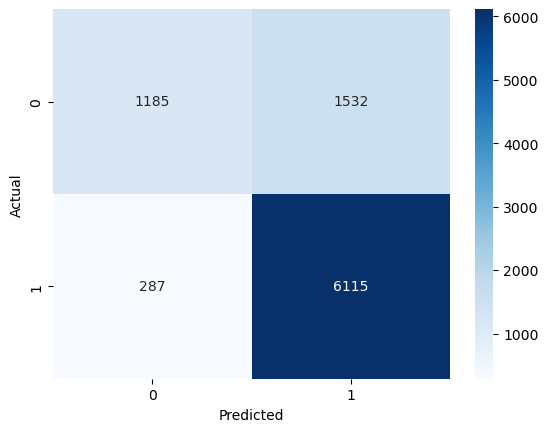

In [20]:
cm = confusion_matrix(y2_test, pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


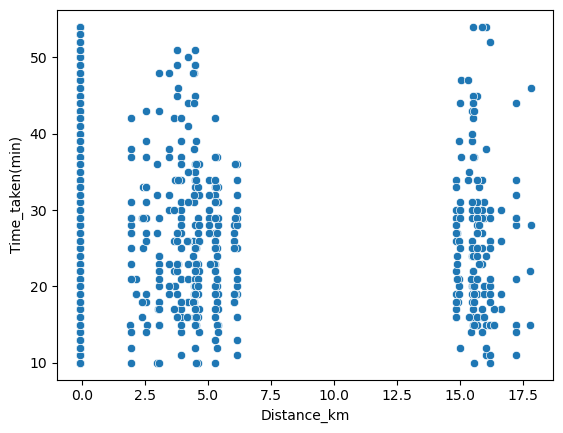

In [21]:
sns.scatterplot(x=df['Distance_km'], y=df['Time_taken(min)'])
plt.show()


In [22]:
df.corr()['Time_taken(min)'].sort_values(ascending=False)


Time_taken(min)            1.000000
Delivery_person_Age        0.292708
Type_of_order              0.002847
Distance_km               -0.002508
Type_of_vehicle           -0.080572
Delivery_person_Ratings   -0.331103
Status                    -0.809980
Name: Time_taken(min), dtype: float64